#  Original and Mask Images Prepare

In [137]:
from PIL import Image
import os

import numpy as np

def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape) > 2:
        img=img[:,:,0]
        return img
    else:
        return img

def pre_images(resize_shape,path):
    dirs=os.listdir(path)
    l = []
    dirs.sort()
    for i in range (1,len(dirs)+1):
        img=Image.open(path+str(i)+'.png')
        img=img.resize((resize_shape),Image.ANTIALIAS)
        img=convert_one_channel(np.asarray(img))
        l.append(img)
    return l

In [138]:
! git clone https://github.com/RobertSmithers/TeethSegmentation.git

fatal: destination path 'TeethSegmentation' already exists and is not an empty directory.


In [139]:
import sys
sys.path.append("/content/TeethSegmentation")

In [140]:
%cd '/content/3DTeethSegmentation/'

/content/3DTeethSegmentation


In [141]:
og_path1 = '/content/3DTeethSegmentation/data/original_img/'
masked_path2 = '/content/3DTeethSegmentation/data/masked_img/'

resize_shape = (3100,1200)
og_img = pre_images(resize_shape, og_path1)

mask_img = pre_images(resize_shape, masked_path2)

In [142]:
x_train = og_img[:117]
y_train=mask_img[:117]
x_test=og_img[117:]
y_test=mask_img[117:]

#View a specific original image and its masked image

#Note: There are 116 original images (1.png to 116.png)
#x_train=og_img[desired_image_number - 1]
#y_train=mask_img[desired_image_number - 1]

# so if you want to see image 116.png do:
#x_train=og_img[115,:,:,:]

# Testing

58


(-0.5, 3099.5, 1199.5, -0.5)

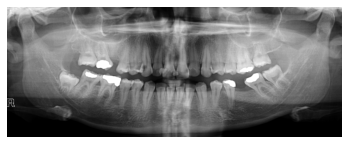

In [145]:
#Check
import random
import matplotlib.pyplot as plt
random_number=random.randint(1,117)
print(random_number)

#Checking data X and Y matching

#Shows img of random_number
plt.imshow(x_train[random_number-1], cmap = 'gray')
plt.axis('off')

#Example shows 58.png

58


(-0.5, 3099.5, 1199.5, -0.5)

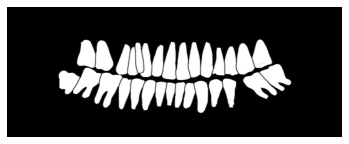

In [146]:
#Checking data X and Y matching
print(random_number)

#Shows img of random_number
plt.imshow(y_train[random_number-1], cmap = 'gray')
plt.axis('off')

#Example shows 58.png